In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
asnparr = lambda df : df.to_numpy(dtype=np.uint8, copy=True)

def load_data(data_dir, sample=False, n=None):
    data = pd.read_csv(data_dir)
    if sample:
        if n is None:
            n = len(data)
        data = data.sample(n)
    x = asnparr(data.drop('label', axis=1))
    y = asnparr(data['label'])
    return x, y

In [3]:
import os
parent_dir = '/kaggle/input/digit-recognizer'

In [4]:
dsdir = os.path.join(parent_dir, 'train.csv')
X, y = load_data(dsdir)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
%matplotlib inline
def display_digit(_1dnparr, off_axis=True):
    _2dnparr = _1dnparr.reshape(28, 28)
    plt.imshow(_2dnparr, cmap = mpl.cm.binary)
    if off_axis:
        plt.axis('off')
    plt.show()

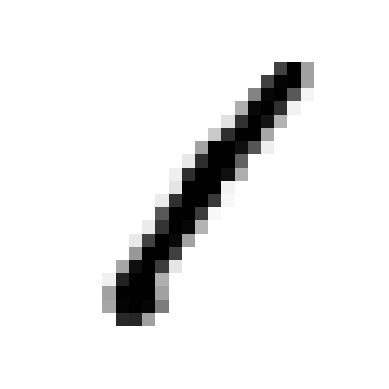

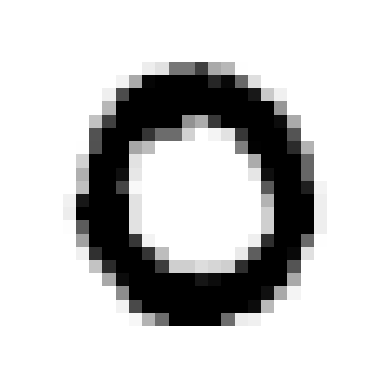

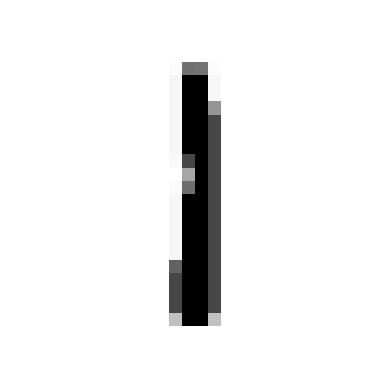

[1, 0, 1]

In [6]:
[y[i] for i in range(3) if display_digit(X[i]) is None]

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X, y)
knn_pred = knn.predict(X)
accuracy_score(y, knn_pred)

1.0

In [8]:
tstdir = os.path.join(parent_dir, 'test.csv')
Xtst = asnparr(pd.read_csv(tstdir))
knn_tst_pred = knn.predict(Xtst)

In [9]:
with open('MNIST-test-set-predections.csv', 'wt') as ofile:
    ofile.write("ImageId,Label\n")
    n = len(knn_tst_pred)
    for i in range(n):
        ofile.write(f"{i+1},{knn_tst_pred[i]}\n")